<a href="https://colab.research.google.com/github/dxk5271/jupyter/blob/master/Dans_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replication Example 
Marjan Orang
Spring 2021

In [1]:
# packages intended to use
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
# data file upload
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving State_Averages5.xlsx to State_Averages5.xlsx
User uploaded file "State_Averages5.xlsx" with length 13793 bytes


In [102]:
# read csv file using pandas package
df = pd.read_excel('State_Averages5.xlsx')
df.head()

,YEAR,IDNUM,Samplea,State,Average_Income_For_State,Average_Mortgage_By_State,Average_Tax_Rate_For_State,Average_House_Size_By_State,Average_Price_Per_Sq/Ft(State),Average_Rent_For_State,Average_Cost_of_HousingandAverage_Income
0,2017,1,1,CA,41611.000000,2284.333000,9.000000,4.766667,636.000000,2557.333000,0.058178
1,2017,2,1,OR,29484.666667,1116.333333,0.000000,5.366667,244.333333,1286.666667,0.040750
2,2017,3,1,WA,36511.000000,1283.666667,9.233333,5.566667,289.333333,1360.333333,0.036208
3,2017,4,1,NV,29595.333333,1036.000000,8.083333,5.233333,197.666667,1152.333333,0.036971
4,2017,5,1,ID,28105.666667,863.666667,6.000000,5.700000,206.000000,951.333333,0.032289


In [73]:
# list of column names
df.columns

Index(['YEAR', 'IDNUM', 'Samplea', 'State', 'Average_Income_For_State',
       'Average_Mortgage_By_State', 'Average_Tax_Rate_For_State',
       'Average_House_Size_By_State', 'Average_Price_Per_Sq/Ft(State)',
       'Average_Rent_For_State', 'Average_Cost_of_HousingandAverage_Income'],
      dtype='object')

In [106]:
df1 = df
df1['year2'] = df1.YEAR
df1 = df1.set_index(['IDNUM','YEAR'])
df1.head(7)

,,Samplea,State,Average_Income_For_State,Average_Mortgage_By_State,Average_Tax_Rate_For_State,Average_House_Size_By_State,Average_Price_Per_Sq/Ft(State),Average_Rent_For_State,Average_Cost_of_HousingandAverage_Income,year2
IDNUM,YEAR,,,,,,,,,,
1,2017,1,CA,41611.000000,2284.333000,9.000000,4.766667,636.000000,2557.333000,0.058178,2017
2,2017,1,OR,29484.666667,1116.333333,0.000000,5.366667,244.333333,1286.666667,0.040750,2017
3,2017,1,WA,36511.000000,1283.666667,9.233333,5.566667,289.333333,1360.333333,0.036208,2017
4,2017,1,NV,29595.333333,1036.000000,8.083333,5.233333,197.666667,1152.333333,0.036971,2017
5,2017,1,ID,28105.666667,863.666667,6.000000,5.700000,206.000000,951.333333,0.032289,2017
6,2017,1,AZ,25949.333333,1101.666667,6.433333,4.866667,201.000000,971.000000,0.039937,2017
7,2017,1,UT,31604.333333,1146.000000,6.433333,6.400000,194.333333,1120.666667,0.035860,2017


In [109]:
df_paper = df1[[ 'Average_Income_For_State','Average_Mortgage_By_State', 'Average_Tax_Rate_For_State', 'Average_House_Size_By_State', 'Average_Price_Per_Sq/Ft(State)','Average_Rent_For_State','Average_Cost_of_HousingandAverage_Income', 'year2']]
df_paper.head()

,,Average_Income_For_State,Average_Mortgage_By_State,Average_Tax_Rate_For_State,Average_House_Size_By_State,Average_Price_Per_Sq/Ft(State),Average_Rent_For_State,Average_Cost_of_HousingandAverage_Income,year2
IDNUM,YEAR,,,,,,,,
1,2017,41611.000000,2284.333000,9.000000,4.766667,636.000000,2557.333000,0.058178,2017
2,2017,29484.666667,1116.333333,0.000000,5.366667,244.333333,1286.666667,0.040750,2017
3,2017,36511.000000,1283.666667,9.233333,5.566667,289.333333,1360.333333,0.036208,2017
4,2017,29595.333333,1036.000000,8.083333,5.233333,197.666667,1152.333333,0.036971,2017
5,2017,28105.666667,863.666667,6.000000,5.700000,206.000000,951.333333,0.032289,2017


In [110]:
df_paper.describe()

,Average_Income_For_State,Average_Mortgage_By_State,Average_Tax_Rate_For_State,Average_House_Size_By_State,Average_Price_Per_Sq/Ft(State),Average_Rent_For_State,Average_Cost_of_HousingandAverage_Income,year2
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,34422.120000,1045.806660,6.141400,6.538667,184.836667,1074.086660,0.032350,2017.0
std,17225.473107,276.205003,2.331722,6.493661,110.812760,300.685086,0.007014,0.0
min,24080.333333,679.333333,0.000000,4.566667,97.666667,704.333333,0.007686,2017.0
25%,29512.333333,864.916667,6.000000,5.375000,125.916667,882.416667,0.028737,2017.0
50%,31703.166667,983.166667,6.648333,5.616667,152.333333,986.666667,0.031634,2017.0
75%,34955.250000,1133.583333,7.264167,5.925000,196.833333,1166.166667,0.035226,2017.0
max,150160.000000,2284.333000,9.583333,51.433333,636.000000,2557.333000,0.058178,2017.0


In [64]:
!pip install linearmodels

     |████████████████████████████████| 1.5MB 8.5MB/s 
     |████████████████████████████████| 9.5MB 48.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [65]:

from linearmodels.panel import PanelOLS

In [ ]:
df1.columns

In [101]:
#Table 3, Column 1

exog_vars = ['Average_Income_For_State','Average_Mortgage_By_State', 'Average_Tax_Rate_For_State','Average_House_Size_By_State','Average_Price_Per_Sq/Ft(State)','Average_Rent_For_State']
exog = sm.add_constant(df_paper[exog_vars])

mod = PanelOLS(df_paper.Average_Cost_of_HousingandAverage_Income, exog)
fe_res = mod.fit()
print(fe_res)

                                     PanelOLS Estimation Summary                                      
Dep. Variable:     Average_Cost_of_HousingandAverage_Income   R-squared:                        0.8929
Estimator:                                         PanelOLS   R-squared (Between):              0.8929
No. Observations:                                        50   R-squared (Within):               0.0000
Date:                                      Fri, Apr 02 2021   R-squared (Overall):              0.8929
Time:                                              00:21:25   Log-likelihood                    233.41
Cov. Estimator:                                  Unadjusted                                           
                                                              F-statistic:                      59.772
Entities:                                                50   P-value                           0.0000
Avg Obs:                                             1.0000   Distributio

In [ ]:
#Table 3, Column 1

exog_vars = ['ln_commit', 'inflation', 'per_exch', 'year2']
exog = sm.add_constant(df_paper[exog_vars])

mod = PanelOLS(df_paper.ln_WB_tofg, exog)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             ln_WB_tofg   R-squared:                        0.8054
Estimator:                   PanelOLS   R-squared (Between):              0.9521
No. Observations:                1097   R-squared (Within):               0.2606
Date:                Fri, Mar 26 2021   R-squared (Overall):              0.8054
Time:                        01:48:01   Log-likelihood                   -1039.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1130.1
Entities:                          97   P-value                           0.0000
Avg Obs:                       11.309   Distribution:                  F(4,1092)
Min Obs:                       2.0000                                           
Max Obs:                       22.000   F-statistic (robust):             1130.1
                            

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
#Table 3, Column 2

exog_vars = ['ln_commit', 'US_friend', 'inflation', 'per_exch', 'year2']
#exog_vars = ['ln_commit', 'inflation', 'per_exch', 'year2']
exog = sm.add_constant(df_paper[exog_vars])

from linearmodels.panel import PanelOLS
mod = PanelOLS(df_paper.ln_WB_tofg, exog)
#, entity_effects=True , drop_absorbed=True

#mod = PanelOLS(data.lwage, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             ln_WB_tofg   R-squared:                        0.8055
Estimator:                   PanelOLS   R-squared (Between):             -0.3814
No. Observations:                1097   R-squared (Within):               0.8165
Date:                Thu, Feb 25 2021   R-squared (Overall):              0.8055
Time:                        04:22:10   Log-likelihood                   -1038.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      903.88
Entities:                          22   P-value                           0.0000
Avg Obs:                       49.864   Distribution:                  F(5,1091)
Min Obs:                       23.000                                           
Max Obs:                       61.000   F-statistic (robust):             903.88
                            

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
#Table 3, Column 3

exog_vars = ['ln_commit', 'US_friend', 'inflation', 'LUS_friend_inf','per_exch', 'US_friend_per_exch', 'year2']
#exog_vars = ['ln_commit', 'inflation', 'per_exch', 'year2']
exog = sm.add_constant(df_paper[exog_vars])

from linearmodels.panel import PanelOLS
mod = PanelOLS(df_paper.ln_WB_tofg, exog)
#, entity_effects=True , drop_absorbed=True

#mod = PanelOLS(data.lwage, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             ln_WB_tofg   R-squared:                        0.8067
Estimator:                   PanelOLS   R-squared (Between):             -0.3535
No. Observations:                1097   R-squared (Within):               0.8174
Date:                Thu, Feb 25 2021   R-squared (Overall):              0.8067
Time:                        04:20:08   Log-likelihood                   -1035.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      649.12
Entities:                          22   P-value                           0.0000
Avg Obs:                       49.864   Distribution:                  F(7,1089)
Min Obs:                       23.000                                           
Max Obs:                       61.000   F-statistic (robust):             649.12
                            

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
def Interact (a, b):
  return a*b

df_paper ['Inf_USF']= Interact (df_paper.inflation, df_paper.US_friend)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_paper.head()

,,ln_WB_tofg,ln_commit,US_friend,inflation,per_exch,year2,Inf_USF
YEAR,IDNUM,,,,,,,
1994,2,3.779778,5.383770,1.0,0.225651,-0.072888,1994,0.225651
1995,2,3.973295,5.551557,1.0,0.077932,-0.020353,1995,0.077932
1996,2,3.660733,5.784458,1.0,0.127255,0.127311,1996,0.127255
1997,2,3.108865,5.726002,1.0,0.331803,0.425210,1997,0.331803
1998,2,4.297619,5.889020,1.0,0.206429,0.011417,1998,0.206429


I will be defining the variables to create the histogram and scatter plot : 


In [ ]:
x = df.ln_pop
y = df.WB
z = df.ln_gdp
#a = df.YEAR
#b = df.IDNUM
#c = df.yhat_ols

Histogram of ln_pop



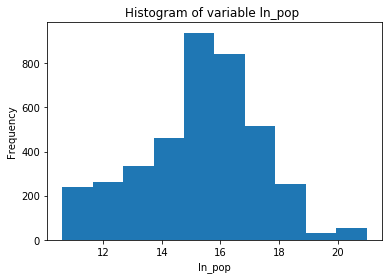

In [ ]:
plt.hist((x))
plt.title('Histogram of variable ln_pop ')
plt.xlabel('ln_pop')
plt.ylabel('Frequency')
plt.show()


Histogram of WB

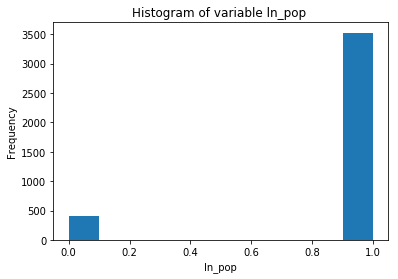

In [ ]:
plt.hist((y))
plt.title('Histogram of variable WB ')
plt.xlabel('WB')
plt.ylabel('Frequency')
plt.show()

Histogram of ln_gdp

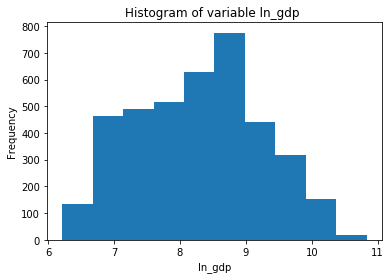

In [ ]:
plt.hist((z))
plt.title('Histogram of variable ln_gdp ')
plt.xlabel('ln_gdp')
plt.ylabel('Frequency')
plt.show()

Scatter Plot between ln-Pop & WB :



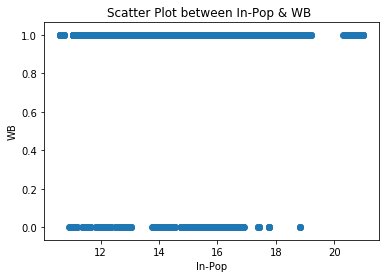

In [ ]:
plt.scatter(x,y)
plt.title('Scatter Plot between ln-Pop & WB ')
plt.xlabel('ln-Pop')
plt.ylabel('WB')
plt.show()

Scatter Plot between ln_pop & ln_gdp

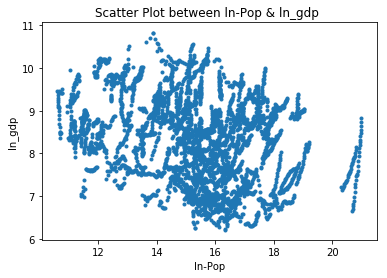

In [ ]:
plt.scatter(x,z, marker = ".")
plt.title('Scatter Plot between ln-Pop & ln_gdp ')
plt.xlabel('ln-Pop')
plt.ylabel('ln_gdp')
plt.show()